In [1]:
from selenium import webdriver
from selenium.webdriver.support.wait import WebDriverWait
from selenium.webdriver.support import expected_conditions
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.common.action_chains import ActionChains
from selenium.webdriver.support.ui import Select

from bs4 import BeautifulSoup
import requests
import time


import pandas as pd
import numpy as np
import datetime as dt 

import matplotlib.pyplot as plt
import seaborn as sns

import pickle
import os
import warnings

warnings.filterwarnings('ignore')
pd.options.display.max_columns=100
plt.style.use('ggplot')

headers = {'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.3'}

path=r'C:\Users\berid\python\zoommer_phones_project'

# Scraping Data

In [ ]:
driver=webdriver.Edge()
driver.maximize_window()

In [ ]:
driver.get('https://zoommer.ge/en/mobiluri-telefonebi-c855')

In [ ]:
count_previous=0
count_same=0

while True:
    try:

        phone_url_elements=driver.find_elements(By.CSS_SELECTOR,'div[class="sc-1e9b893c-12 ivzNCf"] div[style*="width"][style*="100%"]')
        count_same+=1 if len(phone_url_elements)==count_previous else 0

        if count_same==5:
            break

        count_previous=len(phone_url_elements)
        time.sleep(1)


        load_more_button=WebDriverWait(driver,10).until(expected_conditions.element_to_be_clickable((By.CSS_SELECTOR,'div[class="sc-1e9b893c-14 EeYoy"] h4')))
        driver.execute_script('arguments[0].scrollTo();',load_more_button)
        driver.execute_script('arguments[0].click();',load_more_button)
        time.sleep(1)

        driver.execute_script("window.scrollTo(0, document.body.scrollHeight);")
        time.sleep(1)
    except:
        break

    print(count_previous,count_same,end='\r')

In [ ]:
phone_url_elements=driver.find_elements(By.CSS_SELECTOR,'div[class="sc-1e9b893c-12 ivzNCf"] div[style*="100%"][style*="100%"]')

phone_urls_list=[]
for phone_url_element in phone_url_elements:
    try:
        url=phone_url_element.find_element(By.CSS_SELECTOR,'div a').get_attribute('href')
        phone_urls_list.append(url)
    except:
        continue

phone_urls_list=list(set(phone_urls_list))
len(phone_urls_list)


In [ ]:
driver.quit()

In [ ]:
#pickle.dump(phone_urls_list,open(os.path.join(path,'phone_urls_list.pickle'),'wb'))
phone_urls_list=pickle.load(open(os.path.join(path,'phone_urls_list.pickle'),'rb'))

In [ ]:
def return_data_dict(phone_url):
    
    html=requests.get(phone_url,headers=headers).content
    soup=BeautifulSoup(html,'html.parser')

    data_dict={}

    try:
        model=soup.select_one('div[class="sc-c48763b6-0 dequss"] div[class="sc-c48763b6-2 luLSF"]').text
    except:
        model=None

    try:
        price=soup.select_one('div[class="sc-e4245f5-4 bgICiy"] div[class="sc-a6289b29-1 gmRhgO"] div[class="sc-a6289b29-5 hrBNzc"]').text
    except:
        price=None

    data_dict['Model']=model
    data_dict['Price']=price

    spec_elements=soup.select('div[class="sc-7d473447-2 gDyRXI"] tr[class="sc-a66ef3eb-6 eHtmvb"]')
    for spec_element in spec_elements:
        try:
            label=spec_element.select_one('td:nth-child(1)').text
            value=spec_element.select_one('td:nth-child(2)').text
            data_dict[label]=value
        except:
            continue


    return data_dict

In [ ]:
all_data=[]

for i, phone_url in enumerate(phone_urls_list,start=1):
    try:
        data_dict=return_data_dict(phone_url)
    except:
        continue
    
    all_data.append(data_dict)

    print(i,end='\r')


In [ ]:
df=pd.DataFrame(all_data)
#df.to_csv(os.path.join(path,'zoommer_phones.csv'),index=False)

# Cleaning And Preprocessing Data

In [3]:
df=pd.read_csv(os.path.join(path,'zoommer_phones.csv'))

In [4]:
df.sample()

,Model,Price,Brand:,Date of issue:,Stereo Speaker:,SIM card:,E-SIM:,5G:,Build:,IP Protection:,Chipset:,Graphics processor:,System:,System Version:,Color:,Bluetooth:,NFC:,Screen protection:,Screen type:,Screen brightness:,Refresh rate:,Resolution:,Screen size:,Element type:,Wireless Charging Speed:,Wireless Charging:,Charging Speed:,Battery:,Internal memory:,Memory standard:,RAM:,Micro SD Slot:,3.5mm:,Charging Interface:,Weight:,Additional Camera:,Front camera:,Video resolution of the main camera:,Front camera video resolution:,Main camera:,USB Port:,Technology:,Processor:,Connection standard:,SIM card-SIM:,SIM Type:,WLAN:,FM radio:,3.5 mm port:,Additional memory:,N1 selfie camera:,Selfie video:,Selfie camera type:,Additional features of Selfie:,Selfie camera:,Size mAh:,An additional feature of the screen:,Screen format:,Screen resolution:,Screen surface:,GPS:,Fingerprint:,Main camera type:,№1 camera:,№2 Camera:,№3 Camera:,Additional features:,Video:,Main camera:,Operating system:,Model:,Assembling :,Protection:,Wireless charging:,№2 selfie camera:,Face recognition:
364,Apple iPhone 14 Plus | 128GB Blue,2099 ₾2299 ₾,Apple,"2022, October",NaN,NaN,NaN,NaN,NaN,NaN,Apple A15 Bionic (5 nm),Apple GPU (5-core graphics),NaN,NaN,Blue,"LE, A2DP, 5.3",YES,"oleophobic coating, Scratch-resistant ceramic ...",Super Retina XDR OLED,NaN,NaN,NaN,6.7 inches,Non-removable,NaN,NaN,NaN,NaN,128 GB,NaN,6 GB,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Lightning,GSM / CDMA / HSPA / EVDO / LTE / 5G,Hexa-core (2x3.23 GHz Avalanche + 4x1.82 GHz B...,5G,Dual SIM,"Nano-SIM, eSIM","Dual-band, Wi-Fi 802.11 a/b/g/n/ac/6, Hotspot",NO,NO,NO,"12 MP, f/1.9, 23mm (wide), 1/3.6, PDAF","1080p@25/30/60/120fps, gyro-EIS , 4K@24/25/30/...",Dual,"HDR, Cinematic mode (4K@30fps)",12 MP+SL 3D,Li-Ion 4323 mAh,"1200 nits (peak), HDR10 , Dolby Vision, 800 ni...","(~458 ppi density), 19.5:9 ratio",NaN,109.8 cm2 (~87.4% screen-to-body ratio),"GLONASS, QZSS, BDS, GALILEO, with A-GPS, Yes",NaN,Dual,"12 MP, f/1.5, 26mm (wide), 1/1.7, 1.9µm, dual ...","12 MP, f/2.4, 13mm, 120˚ (ultrawide)",NaN,"HDR (photo/panorama), Dual-LED dual-tone flash","stereo sound rec. , 4K@24/25/30/60fps, 1080p@2...",12+12 MP,iOS 16,iPhone 14 Plus,"glass back (Gorilla Glass), aluminum frame, Gl...",IP68 dust/water resistant (up to 6m for 30 mins),"MagSafe wireless charging 15W, Wireless chargi...","SL 3D, (depth/biometrics sensor)",YES


In [5]:
df.columns=df.columns.str.strip()

In [6]:
#removing columns where percentage of missing values are more than 90%

nan_cols=df.isna().mean()[df.isna().mean()>=0.8].index
df=df.drop(columns=nan_cols)

In [7]:
df['Price']=df['Price'].apply(lambda x:x.split('₾')[0].split('₾')[-1] if isinstance(x,str) else None).apply(pd.to_numeric)

In [8]:
base_date = dt.datetime(1899, 12, 30)

df['Date of issue:']=df['Date of issue:'].apply(lambda x:(pd.to_datetime(x)-base_date).days if pd.notna(x) and x.isdigit()==False else x)


In [9]:
df=df.replace({'Yes':1,'No':0,'YES':1,'NO':0})

In [10]:
df['SIM card:']=df['SIM card:'].replace({'Dual SIM':1,'Single SIM':0})

In [11]:
dust_resistance=df['IP Protection:'].apply(lambda x:x.replace('IP','')[0] if isinstance(x,str) else None).apply(pd.to_numeric)
water_resistance=df['IP Protection:'].apply(lambda x:x.replace('IP','')[1] if isinstance(x,str) else None).apply(pd.to_numeric)

df.insert(df.columns.get_loc('IP Protection:')+1,'Dust Resistance:',dust_resistance)
df.insert(df.columns.get_loc('IP Protection:')+2,'Water Resistance:',water_resistance)
df=df.drop(columns='IP Protection:')

In [12]:
df['Screen brightness:']=df['Screen brightness:'].apply(lambda x:x.split(' ')[0] if isinstance(x,(str)) else None).apply(pd.to_numeric)

In [13]:
df['Refresh rate:']=df['Refresh rate:'].apply(lambda x:x.split(' ')[0] if isinstance(x,(str)) else None).apply(pd.to_numeric)

In [14]:
display_points = {
    'FHD+': 4,  # Best display
    'QHD+': 3,  # Next best
    'HD+': 2,   # Mid-range display
    'HD': 1     # Lowest quality
}

df['Resolution:']=df['Resolution:'].apply(lambda x:display_points[x] if x in display_points else 1)

In [15]:
df['Screen size:']=df['Screen size:'].apply(lambda x:x.split(' ')[0] if isinstance(x,(str)) else None).apply(pd.to_numeric)

In [16]:
df['Charging Speed:']=df['Charging Speed:'].apply(lambda x:x.split('W')[0] if isinstance(x,(str)) else None).apply(pd.to_numeric)

In [17]:
df['Wireless Charging Speed:']=df['Wireless Charging Speed:'].apply(lambda x:x.split('W')[0] if isinstance(x,(str)) else None).apply(pd.to_numeric)

In [18]:
df['Battery:']=df['Battery:'].apply(lambda x:x.split(' ')[0] if isinstance(x,(str)) else None).apply(pd.to_numeric)

In [19]:
df['RAM:']=df['RAM:'].apply(lambda x:
                 int(x.split('GB')[0]) if 'GB' in str(x) else 
                 int(x.split('MB')[0])/1024 if 'MB' in str(x) else None
                 ).apply(pd.to_numeric)

df['Internal memory:']=df['Internal memory:'].apply(lambda x:
                 int(x.split('GB')[0]) if 'GB' in str(x) else 
                 int(x.split('MB')[0])/1024 if 'MB' in str(x) else None
                 ).apply(pd.to_numeric)

In [20]:
df['Weight:']=df['Weight:'].apply(lambda x:x.split('g')[0] if isinstance(x,(str)) else None).apply(pd.to_numeric)

In [21]:
df['Front camera:']=df['Front camera:'].apply(lambda x:
                          x.split('MP')[0].strip().split(' ')[-1].strip() if isinstance(x,str) and 'vga' not in str(x).lower() else
                          0 if 'vga' in str(x).lower() else None).apply(pd.to_numeric)

df['Additional Camera:']=df['Additional Camera:'].apply(lambda x:
                          x.split('MP')[0].strip().split(' ')[-1].strip() if isinstance(x,str) and 'vga' not in str(x).lower() else
                          0 if 'vga' in str(x).lower() else None).apply(pd.to_numeric)

In [22]:
df['Brand:']=df['Brand:'].replace({'Apple, Apple':'Apple','Oneplus':'OnePlus'})

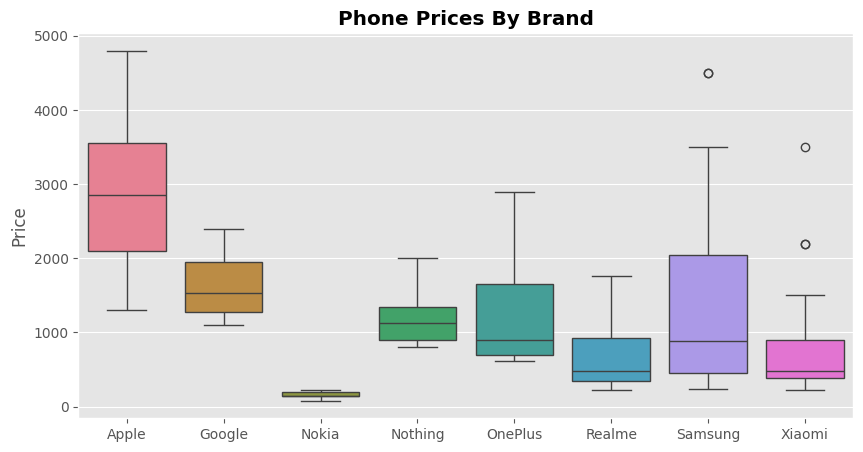

In [23]:
fig,ax=plt.subplots(figsize=(10,5))
sns.boxplot(df.sort_values('Brand:',ascending=True),x='Brand:',y='Price',hue='Brand:')
plt.legend().remove()
plt.xlabel(None)
plt.title('Phone Prices By Brand',fontweight='bold')
plt.show()

In [24]:
unwanted_cols = df.select_dtypes(object).nunique()[df.select_dtypes(object).nunique() >= 8].index
unwanted_cols = list(unwanted_cols)

unwanted_cols.remove('Brand:')

df=df.drop(columns=unwanted_cols)

In [25]:
#get dummies

for col in df.select_dtypes(object):
    dummies=pd.get_dummies(df[col],dummy_na=False)
    df=df.drop(columns=col)
    df=pd.concat([df,dummies],axis=1)

df.shape

(376, 45)

# Train ML Model And Test On Unseen Data

In [26]:
df=df[df['Price'].notna()]

In [27]:
X=df.drop(columns='Price')
y=df['Price']

from sklearn.model_selection import train_test_split

X_train, X_test,y_train, y_test=train_test_split(X,y,test_size=0.3)

In [28]:
from xgboost import XGBRegressor
model=XGBRegressor()

In [29]:
model.fit(X_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [30]:
train_prediction=model.predict(X_train)
test_prediction=model.predict(X_test)

In [31]:
from sklearn import metrics
r2_train=metrics.r2_score(train_prediction,y_train)
r2_test=metrics.r2_score(test_prediction,y_test)
mae_train=metrics.mean_absolute_error(train_prediction,y_train)
mae_test=metrics.mean_absolute_error(test_prediction,y_test)
rmse_train=metrics.mean_squared_error(train_prediction,y_train,squared=False)
rmse_test=metrics.mean_squared_error(test_prediction,y_test,squared=False)
train_scores={'R2_train':r2_train,'MAE_train':mae_train,'RMSE_train':rmse_train}
test_scores={'R2_test':r2_test,'MAE_test':mae_test,'RMSE_test':rmse_test}
print(train_scores)
print(test_scores)

{'R2_train': 0.9998110107135144, 'MAE_train': 2.21420678291612, 'RMSE_train': 13.207353522455211}
{'R2_test': 0.957167795926497, 'MAE_test': 67.77273711483035, 'RMSE_test': 245.74887767483006}


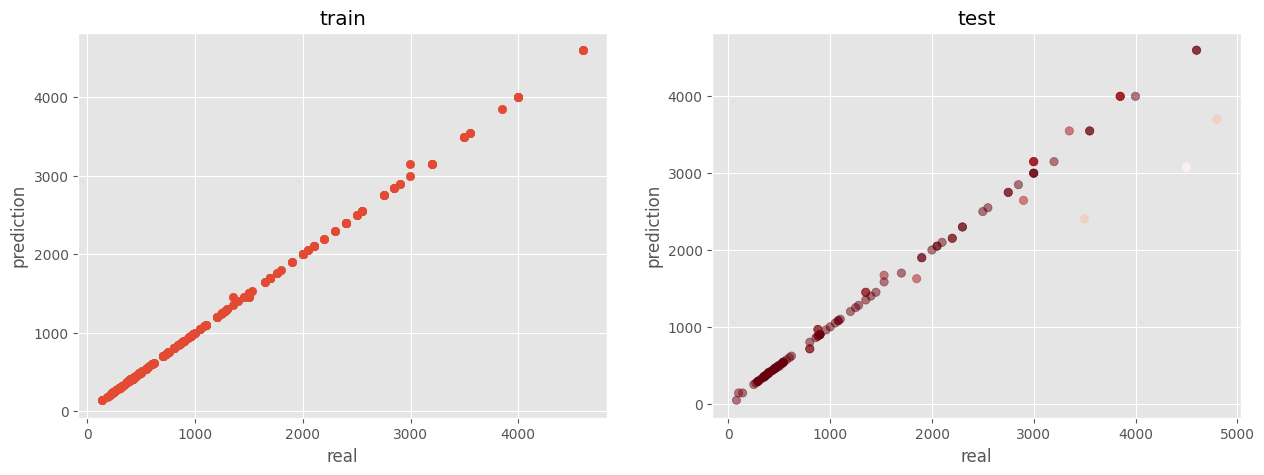

In [32]:
abs_error=np.abs(y_test-test_prediction)

fig, (ax1,ax2)=plt.subplots(1,2,figsize=(15,5))
ax1.scatter(y_train,train_prediction)
ax1.set_xlabel('real')
ax1.set_ylabel('prediction')
ax1.set_title('train')
ax2.scatter(y_test,test_prediction,c=abs_error,cmap='Reds_r',alpha=0.5)
ax2.set_xlabel('real')
ax2.set_ylabel('prediction')
ax2.set_title('test')
plt.show()

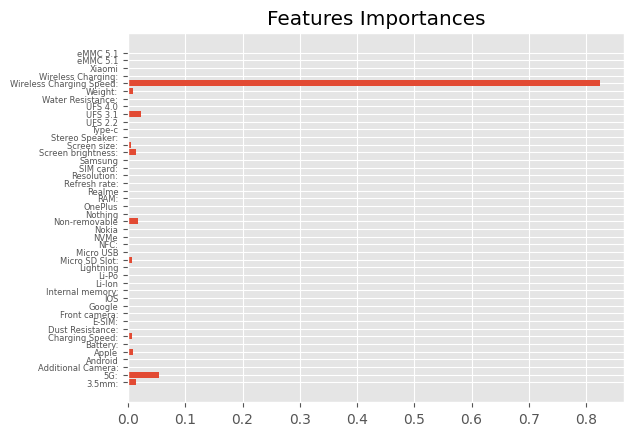

In [33]:
feature_names=model.feature_names_in_
weights=model.feature_importances_

weights_df=pd.DataFrame({'feature_names':feature_names,'weights':weights})
weights_df_grouped=weights_df.groupby(weights_df['feature_names'].str.split('_').str[0])['weights'].sum()

plt.barh(y=weights_df_grouped.index,width=weights_df_grouped.values)
plt.title('Features Importances')
plt.yticks(size=6)
plt.show()